# **Simulação de Vetores RSSI com 10 APs em Área 20m x 20m**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:

# ================================
# 1. Parâmetros do ambiente
# ================================
area_size = 20
grid_step = 1
n_aps = 10
n_measurements = 10  # por ponto de treino
frequency = 2.4e9  # Hz
pt = 20  # dBm
pl0 = 40  # dB
mu = 3.5
sigma = 2
d0 = 1  # m


In [21]:

# ================================
# 2. Posições fixas dos APs
# ================================
np.random.seed(42)
ap_positions = np.random.uniform(0, area_size, size=(n_aps, 2))


In [22]:

# ================================
# 3. Função para gerar RSSI
# ================================
def simulate_rssi(point):
    rssi_values = []
    for ap in ap_positions:
        d = np.linalg.norm(point - ap)
        d = max(d, d0)
        path_loss = pl0 + 20 * np.log10(frequency) + 10 * mu * np.log10(d / d0)
        noise = np.random.normal(0, sigma)
        rssi = pt - path_loss + noise
        rssi = max(rssi, -110)
        rssi_values.append(rssi)
    return rssi_values


In [43]:

# ================================
# 4. Posições de Treinamento (centrais em grid 10x10)
# ================================

train_grid_step = 2  # espaçamento de 2 metros → 10x10 = 100 pontos
train_x, train_y = np.meshgrid(np.arange(1, area_size, train_grid_step),
                               np.arange(1, area_size, train_grid_step))
train_positions = np.column_stack((train_x.ravel(), train_y.ravel()))


# Simular RSSI para treino
train_data = []
for pos in train_positions:
    for _ in range(n_measurements):  # 10 medições por ponto
        rssi_vector = simulate_rssi(pos)
        train_data.append(rssi_vector + [pos[0], pos[1]])


In [44]:

# ================================
# 5. Posições de Teste (2 aleatórios por zona)
# ================================
test_positions = []
for i in range(area_size):
    for j in range(area_size):
        for _ in range(2):  # dois pontos por zona
            x = i + np.random.rand()
            y = j + np.random.rand()
            test_positions.append((x, y))

# Simular RSSI para teste
test_data = []
for pos in test_positions:
    rssi_vector = simulate_rssi(np.array(pos))
    test_data.append(rssi_vector + [pos[0], pos[1]])


In [45]:

# ================================
# 6. DataFrames finais
# ================================
columns = [f'WAP{str(i+1).zfill(3)}' for i in range(n_aps)] + ['X', 'Y']
df_simulated = pd.DataFrame(train_data, columns=columns)
df_test = pd.DataFrame(test_data, columns=columns)

# Adicionar coluna de origem (opcional)
df_simulated["source"] = "real"
df_test["source"] = "test"


In [46]:

# ================================
# 7. Unificar para uso no GAN
# ================================
df_all = pd.concat([df_simulated, df_test], ignore_index=True)


In [47]:

# ================================
# 8. Verificação
# ================================
print(f"Treino: {len(df_simulated)} vetores")
print(f"Teste: {len(df_test)} vetores")
print(f"Total no dataset final (df_all): {len(df_all)} vetores")


Treino: 1000 vetores
Teste: 800 vetores
Total no dataset final (df_all): 1800 vetores


In [48]:

# ================================
# 9. Salvar CSVs (opcional)
# ================================
df_simulated.to_csv("/home/darkcover/Documentos/Gan/Data/df_simulated.csv", index=False)
df_test.to_csv("/home/darkcover/Documentos/Gan/Data/df_test.csv", index=False)
df_all.to_csv("/home/darkcover/Documentos/Gan/Data/df_all.csv", index=False)


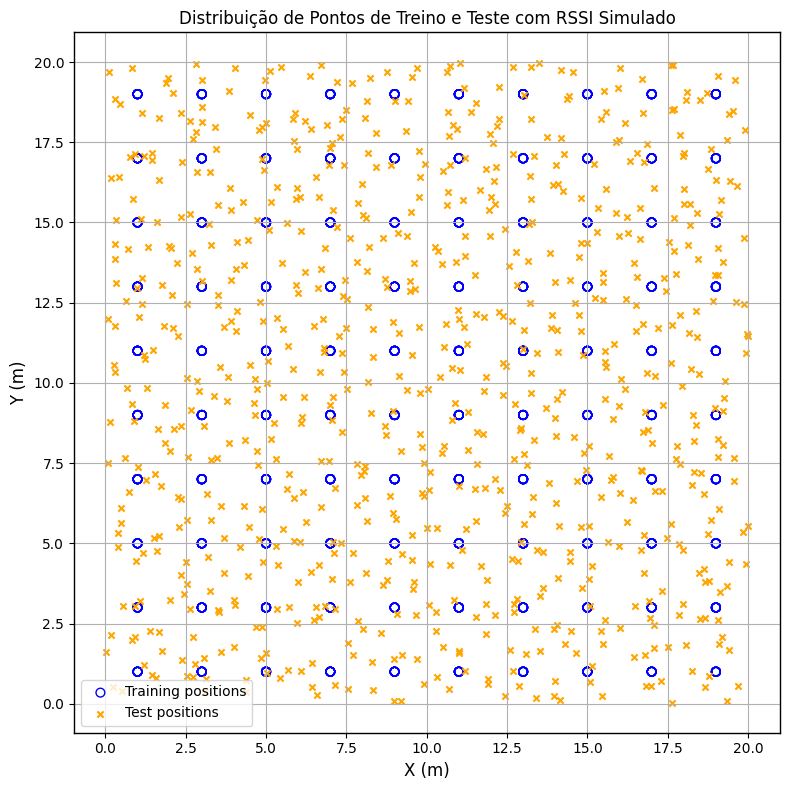

In [53]:
import matplotlib.pyplot as plt

# Separar treino e teste com base na coluna "source"
df_train_vis = df_all[df_all['source'] == 'real']
df_test_vis = df_all[df_all['source'] == 'test']

# Criar figura
plt.figure(figsize=(8, 8))

# Plotar pontos de treino (azul)
plt.scatter(df_train_vis['X'], df_train_vis['Y'], marker='o', facecolors='none',
            edgecolors='blue', s=40, label='Training positions')

# Plotar pontos de teste (vermelho)
plt.scatter(df_test_vis['X'], df_test_vis['Y'], 
            c='orange', marker='x', s=20, label='Test positions')

# Configurações do gráfico
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Distribuição de Pontos de Treino e Teste com RSSI Simulado")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


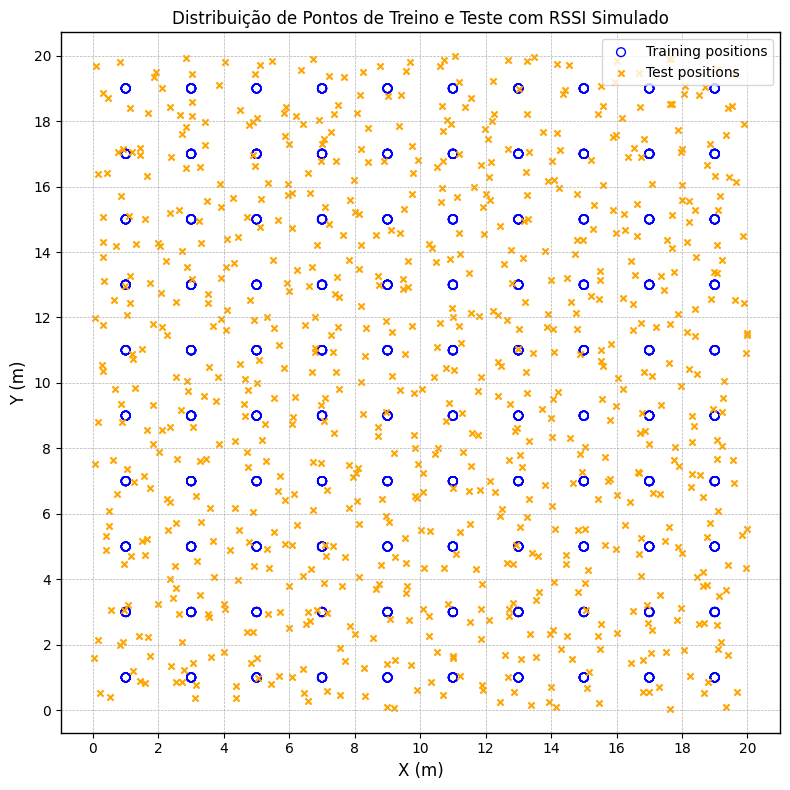

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Separar treino e teste com base na coluna "source"
df_train_vis = df_all[df_all['source'] == 'real']
df_test_vis = df_all[df_all['source'] == 'test']

# Criar figura
plt.figure(figsize=(8, 8))

# Plotar pontos de treino (azul)
plt.scatter(df_train_vis['X'], df_train_vis['Y'], marker='o', facecolors='none',
            edgecolors='blue', s=40, label='Training positions')

# Plotar pontos de teste (laranja)
plt.scatter(df_test_vis['X'], df_test_vis['Y'], 
            c='orange', marker='x', s=20, label='Test positions')

# Configurações dos eixos
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Distribuição de Pontos de Treino e Teste com RSSI Simulado")

# Ajustar os ticks para cada 2 metros
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, 21, 2))

# Adicionar a grade com divisórias a cada 2 metros
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Outras configurações
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


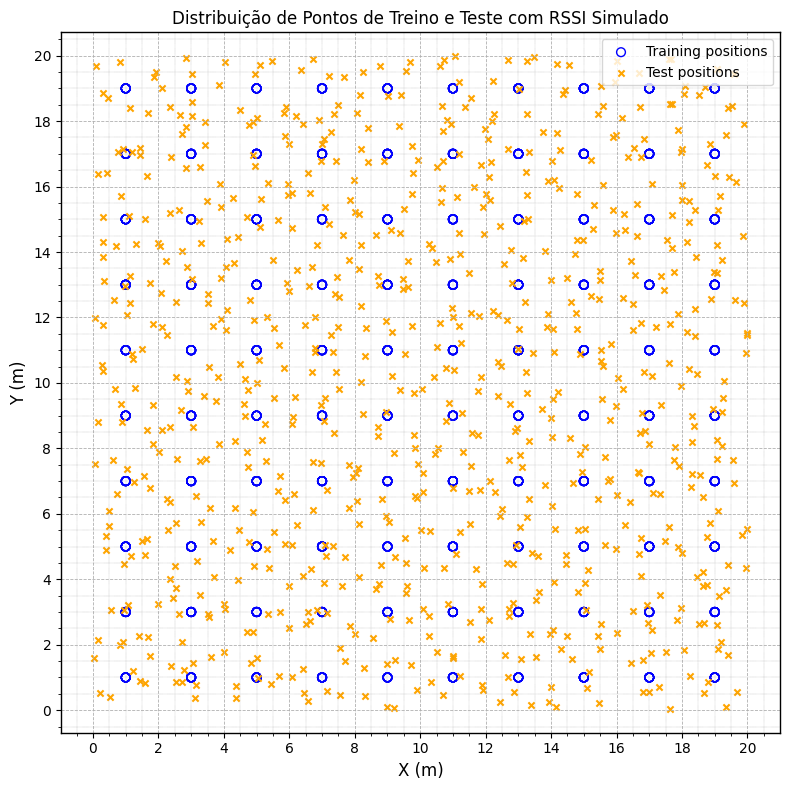

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Separar treino e teste com base na coluna "source"
df_train_vis = df_all[df_all['source'] == 'real']
df_test_vis = df_all[df_all['source'] == 'test']

# Criar figura
plt.figure(figsize=(8, 8))

# Plotar pontos de treino (azul)
plt.scatter(df_train_vis['X'], df_train_vis['Y'], marker='o', facecolors='none',
            edgecolors='blue', s=40, label='Training positions')

# Plotar pontos de teste (laranja)
plt.scatter(df_test_vis['X'], df_test_vis['Y'], 
            c='orange', marker='x', s=20, label='Test positions')

# Configurações dos eixos
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Distribuição de Pontos de Treino e Teste com RSSI Simulado")

# Ticks principais (a cada 2 metros)
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, 21, 2))

# Ativar ticks menores
plt.minorticks_on()

# Sublinhas fracas a cada 1 metro (menores)
plt.grid(which='minor', linestyle=':', linewidth=0.3, color='gray')

# Linhas principais mais fortes a cada 2 metros
plt.grid(which='major', linestyle='--', linewidth=0.6)

# Outras configurações
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


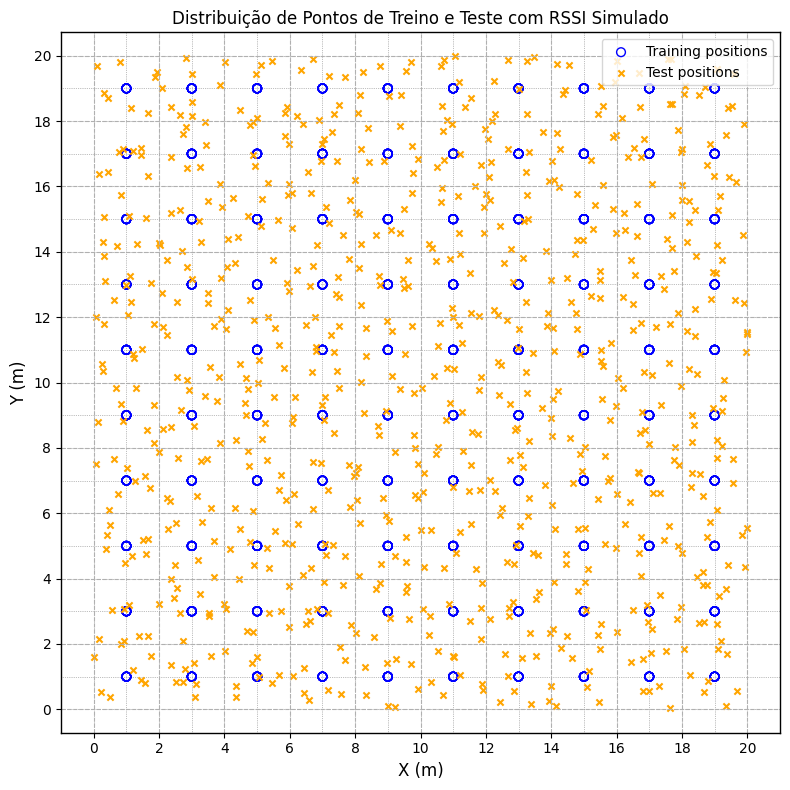

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Separar treino e teste com base na coluna "source"
df_train_vis = df_all[df_all['source'] == 'real']
df_test_vis = df_all[df_all['source'] == 'test']

# Criar figura
plt.figure(figsize=(8, 8))

# Plotar pontos de treino (azul)
plt.scatter(df_train_vis['X'], df_train_vis['Y'], marker='o', facecolors='none',
            edgecolors='blue', s=40, label='Training positions')

# Plotar pontos de teste (laranja)
plt.scatter(df_test_vis['X'], df_test_vis['Y'], 
            c='orange', marker='x', s=20, label='Test positions')

# Sublinhas tracejadas de 1 em 1 metro (por cima dos pontos)
for x in np.arange(0, 21, 1):
    plt.axvline(x, color='gray', linestyle=':', linewidth=0.5, zorder=0)

for y in np.arange(0, 21, 1):
    plt.axhline(y, color='gray', linestyle=':', linewidth=0.5, zorder=0)

# Grade maior de 2 em 2 metros
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, 21, 2))
plt.grid(which='major', linestyle='--', linewidth=0.8)

# Outras configurações
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Distribuição de Pontos de Treino e Teste com RSSI Simulado")
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()
